#### Importing the dependencies

In [59]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt

#### Data Collection and Processing 

In [2]:
#loading the dataset in pandas dataframe
loan_dataset=pd.read_csv('dataset.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
#printing the first 5 rows of the data frame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#print the number of rows and columns 
loan_dataset.shape

(614, 13)

In [6]:
#statistical measure 
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#number of missing values in each column 
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#dropping the missing values as small percentage of values are null 
loan_dataset=loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_dataset.shape

(480, 13)

In [11]:
#label encoding 
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [12]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
#dependent column values 
loan_dataset.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
#replacing th value of 3+ to 4
loan_dataset.replace(to_replace='3+',value=4,inplace=True)

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
loan_dataset.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

#### Data Visualization 

<AxesSubplot:xlabel='Education', ylabel='count'>

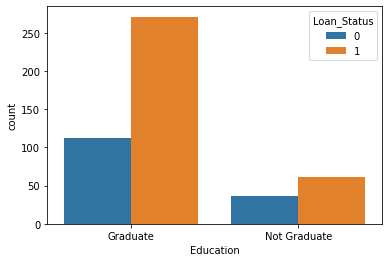

In [16]:
#education vs loan status 
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

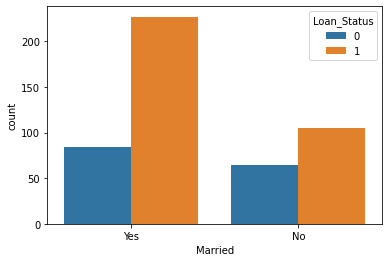

In [17]:
# marital status vs loan 
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [18]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

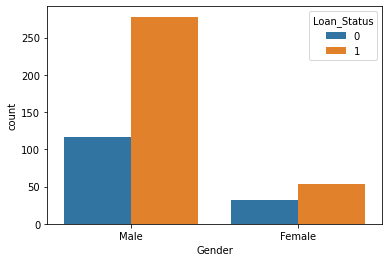

In [20]:
# gender vs loan 
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

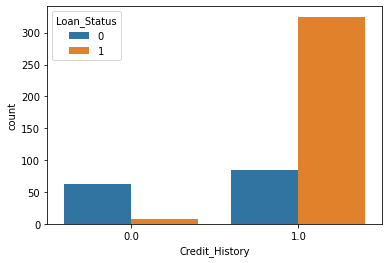

In [21]:
# Credit HIstory vs loan 
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

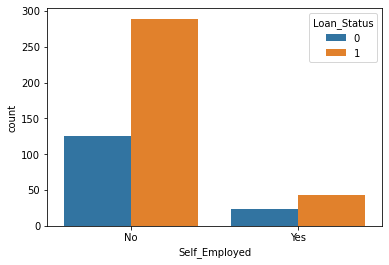

In [22]:
#Self Employed vs Loan Status

sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

In [57]:
corr=loan_dataset.corr()

<AxesSubplot:>

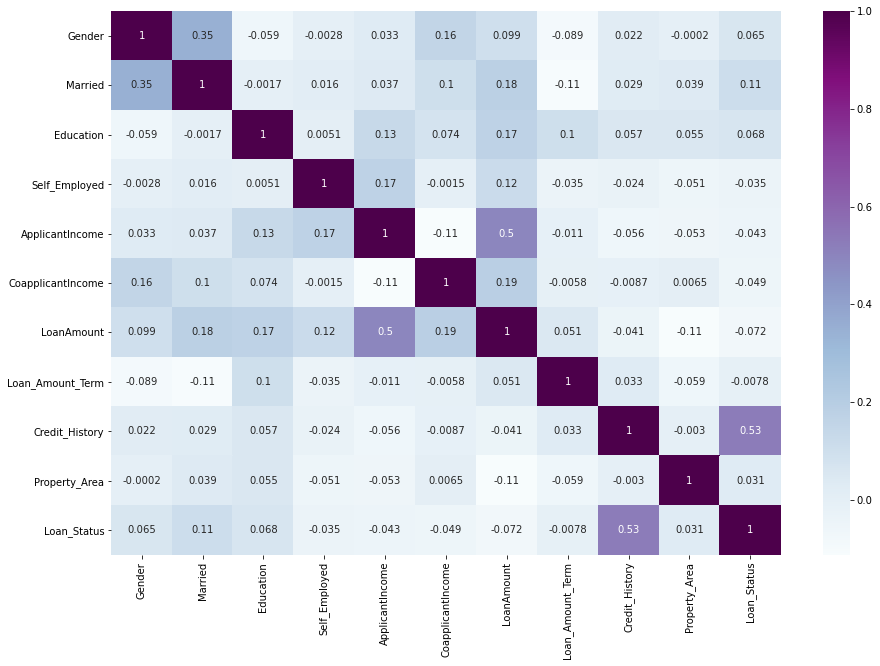

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='BuPu')

##### Encoding categorical columns 

In [61]:
#using label encoding 
#from sklearn.preprocessing import LabelEncoder
#cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
#le = LabelEncoder()
#for col in cols :
    #df[col] = le.fit_transform(df[col])

In [23]:
#label encoding 
loan_dataset.replace({"Married":{'No':0,'Yes':1}},inplace=True)

In [24]:
#label encoding 
loan_dataset.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

In [25]:
#label encoding 
loan_dataset.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)

In [26]:
#label encoding 
loan_dataset.replace({"Married":{'No':0,'Yes':1}},inplace=True)

In [27]:
#label encoding 
loan_dataset.replace({"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [28]:
#label encoding 
loan_dataset.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace=True)

In [29]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
# separating the data and the label
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

##### Splitting the training and the test data

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify= Y,random_state=1)

In [34]:
X_train.shape

(432, 11)

In [35]:
X_test.shape

(48, 11)

##### Modelling using SVM

In [37]:
svmclassifier = svm.SVC(kernel='linear')

In [38]:
#training the svm MODEL 
svmclassifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [39]:
#accurayc score on training data 
X_train_prediction=svmclassifier.predict(X_train)

In [40]:
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [41]:
print(training_data_accuracy)

0.7800925925925926


In [42]:
#test data accuracy 

X_test_prediction=svmclassifier.predict(X_test)

In [43]:
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [44]:
print(test_data_accuracy)

0.7916666666666666


#### Decision Tree Model

In [46]:
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
y_pred_train = treeClassifier.predict(X_train)


In [50]:
print("Training Data Set Accuracy: ", accuracy_score(Y_train,y_pred_train))
print("Training Data F1 Score ", f1_score(Y_train,y_pred_train))



Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0


In [52]:
print("Validation Mean F1 Score: ",cross_val_score(treeClassifier,X_train,Y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(treeClassifier,X_train,Y_train,cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.6508968739892056
Validation Mean Accuracy:  0.6966319165998396


In [53]:
y_pred_test = treeClassifier.predict(X_test)


In [55]:
print("Test Data Set Accuracy: ", accuracy_score(Y_test,y_pred_test))
print("Test Data F1 Score ", f1_score(Y_test,y_pred_test))


Test Data Set Accuracy:  0.7291666666666666
Test Data F1 Score  0.8059701492537314


In [56]:
pd.crosstab(Y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8,7,15
1,6,27,33
All,14,34,48
